### 도수분포표

자료를 몇 개의 구간으로 나누고, 각 구간에 속하는 자료의 개수를 나타낸 표

- 계급 : 구간
- 계급의 크기 : 구간의 너비
- 도수 : 각 계급에 속하는 자료의 수

데이터 불러오기

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
mpg = pd.read_csv("C:/Users/samsung/Desktop/datasets\mpg.csv")

In [19]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


도수분포표 만들기

In [23]:
mpg_hwy = np.array(mpg['hwy']) # array 형태로 변환

In [24]:
# np.histogram을 사용해 각 구간(계급)에 속하는 데이터의 수(도수)와 구간의 크기 확인
counts, bins = np.histogram(mpg_hwy) 

In [25]:
counts # 각 구간별 데이터 수

array([17, 48, 26, 27, 61, 40,  7,  5,  0,  3], dtype=int64)

In [26]:
bins # 각 구간의 크기

array([12. , 15.2, 18.4, 21.6, 24.8, 28. , 31.2, 34.4, 37.6, 40.8, 44. ])

In [49]:
# 구간 생성
hwy_bins = []
for i in range(10):
        hwy_bins.append(f'{bins[i]:.1f} - {bins[i+1]:.1f}')

In [51]:
hwy_bins

['12.0 - 15.2',
 '15.2 - 18.4',
 '18.4 - 21.6',
 '21.6 - 24.8',
 '24.8 - 28.0',
 '28.0 - 31.2',
 '31.2 - 34.4',
 '34.4 - 37.6',
 '37.6 - 40.8',
 '40.8 - 44.0']

In [71]:
# 위에서 생성한 구간을 계급으로, 각 구간별 데이터 수를 도수로 하는 도수분포표 생성
hwy = pd.DataFrame({'bins' : hwy_bins, 'counts' : list(counts)}).set_index('bins')

In [74]:
hwy

,counts
bins,
12.0 - 15.2,17
15.2 - 18.4,48
18.4 - 21.6,26
21.6 - 24.8,27
24.8 - 28.0,61
28.0 - 31.2,40
31.2 - 34.4,7
34.4 - 37.6,5
37.6 - 40.8,0


시각화

(array([17., 48., 26., 27., 61., 40.,  7.,  5.,  0.,  3.]),
 array([12. , 15.2, 18.4, 21.6, 24.8, 28. , 31.2, 34.4, 37.6, 40.8, 44. ]),
 <BarContainer object of 10 artists>)

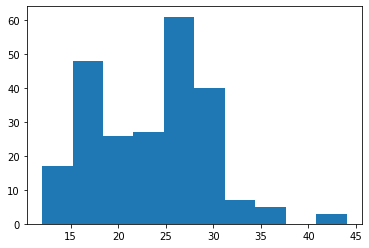

In [89]:
# 위의 도수분포표를 히스토그램으로 시각화
# 10개의 구간으로 나누면 위 표와 같은 결과가 나오는 것을 알 수 있음
plt.hist(mpg['hwy'], bins = 10)